In [1]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="orange" if cm[i, j] > thresh else "black",fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()





def model_stats(labels,predictions,name_of_model,normalize_cf=True):
    print('Classification Report for: '+str(name_of_model))
    print(classification_report(labels, predictions))
    
    cf2 = confusion_matrix(labels,predictions)
    plot_confusion_matrix(cf2,classes=[0,1],normalize=normalize_cf)
    
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    #print('AUC: {}'.format(auc(fpr, tpr)))
    print('AUC: {}'.format(auc(fpr, tpr)))
    plt.figure(figsize=(5, 4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    



Classification Report for: Model XYZ
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.57      0.80      0.67         5

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11

Normalized confusion matrix
[[0.5 0.5]
 [0.2 0.8]]


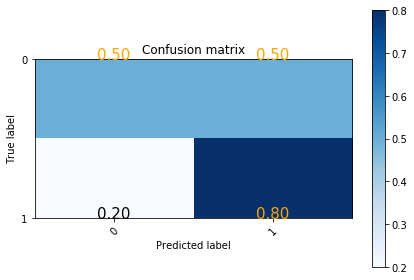

AUC: 0.65


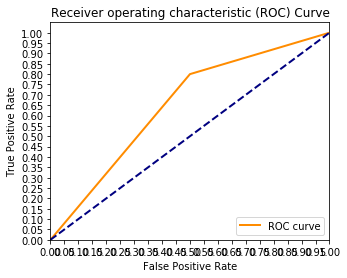

In [2]:
labels= [0,0,0,0,0,0,1,1,1,1,1]
preds= [1,1,0,0,0,1,1,1,0,1,1]

model_stats(labels, preds,'Model XYZ',normalize_cf=True)

In [ ]:
#test